Like feature selection, feature extraction is another dimensionality reduction techique that summarizes (or extracts) the significant information from the dataset by transforming its feature space to low-dimensional space.

Principle component anaysis (PCA) is an **unsupervised** feature extraction method that doesn't require the class label information. PCA relies on the relationship between features and [focuses on capturing the **maximum variation** in the dataset](https://towardsai.net/p/data-science/lda-vs-pca).

Step-by-step instructions on how PCA works is as follows:
1. Preprocess the $d$-dimensional space of the dataset.
2. Create the covariance matrix.
3. Get eigenvectors and eigenvalues from the covariance matrix.
4. Sort eigenvalues and its associated eigenvectors in descending order.
5. Choose the top $k$ eigenvectors. Note that $k$ represents the number of features after PCA. (i.e. $k$-dimensional feature space)
6. Create the projection matrix using the top $k$ eigenvectors.
7. Transform the dataset from $d$-dimensional to the new $k$-dimensional feature space using the projection matrix.

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols',
                  'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
                   '0D280/0D315 of diluted wines', 'proline']
df_wine.head()

,label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,0D280/0D315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].to_numpy(), df_wine.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [3]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [4]:
X_train_std.T.shape

(13, 124)

Estimate the covariance matrix and compute the eigenvectors and eigenvalues.

In [5]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [6]:
# print(eigen_vals)
# print(eigen_vecs)

Plot explained variance ratio for eigenvalues.

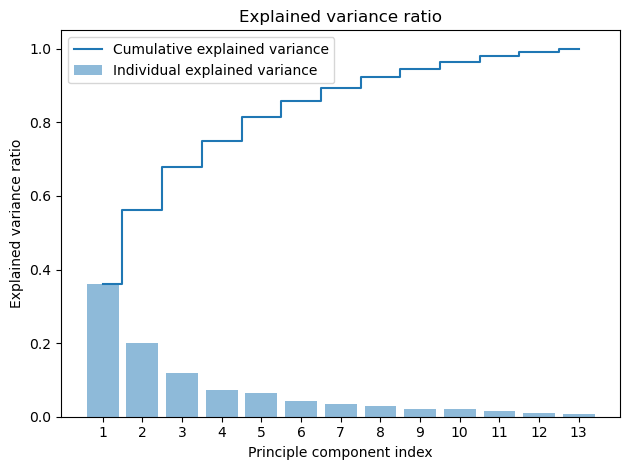

In [7]:
import matplotlib.pyplot as plt
total = sum(eigen_vals)
exp_var = [(i / total) for i in sorted(eigen_vals, reverse=True)]
cum_exp_var = np.cumsum(exp_var)
plt.bar(range(1, 14), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_exp_var, where='mid', label='Cumulative explained variance')
plt.xticks(range(1, 14))
plt.title('Explained variance ratio')
plt.xlabel('Principle component index')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Create a list of tuples (eigenvalues, eigenvectors) and sort a list of tuples in descending order according to eigenvalues.

In [8]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

Choose the **top two** pairs of (eigenvalues, eigenvectors) to create the projection matrix. Note that you can alter this source code if you'd like to use more or less pairs of (eigenvalues, eigenvectors).

In [9]:
proj_mat = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print(proj_mat)

[[-0.14119433  0.46732089]
 [ 0.24946815  0.26876924]
 [-0.05104853  0.27660192]
 [ 0.19890851 -0.01955098]
 [-0.1444494   0.32120489]
 [-0.40472564  0.04839313]
 [-0.42654202 -0.00936768]
 [ 0.29573373  0.00146817]
 [-0.32620144  0.04087554]
 [ 0.07420694  0.53982087]
 [-0.29277478 -0.27536907]
 [-0.37482201 -0.19149315]
 [-0.2889145   0.34828709]]


Transform the 124x13 dimensional space to the new 124x2 dimensional space dataset using the projection matrix.

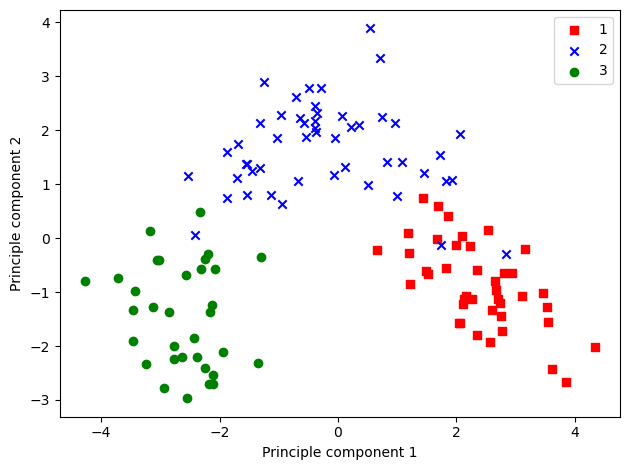

In [10]:
X_train_pca = X_train_std.dot(proj_mat)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0]*-1, X_train_pca[y_train == l, 1]*-1, c=c, label=l, marker=m)
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

*Note that PCA is an unsupervised feature extraction techique which doesn't take class label information as a source of classification indicator. A plot above just indicates how well PCA algorithm classifies samples using two principle components.*

Implement PCA using scikit-learn API.

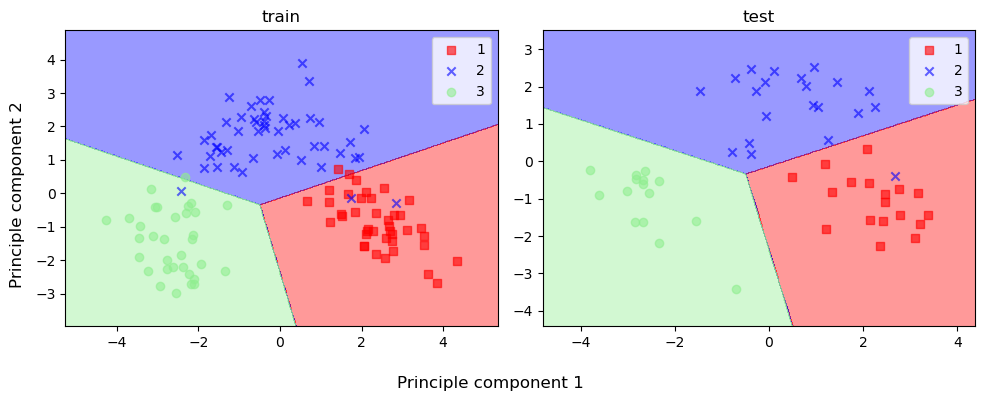

In [11]:
import sys
sys.path.append("machine-learning/guide")
import utils
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train) # train logistic regression model using X_train_pca
utils.visualize_decision_boundary(X_train_pca, y_train, classifier=lr, \
                            x_test=X_test_pca, y_test=y_test, \
                            xlabel="Principle component 1", ylabel="Principle component 2")

Unlike PCA, linear discriminant analysis (LDA) is a supervised feature extraction technique that aims to find the best subset space of features to distinguish each class label. Both PCA and LDA are the linear transformation methods that try to reduce the dimension of the dataset.

Step-by-step guide on how LDA works is as follows:
1. Preprocess the $d$-dimensional space of the dataset.
2. Compute each class label's mean vector in the dataset.
3. Get the scatter matrices, $S_W$ and $S_B$.
4. Calculate eigenvalues and eigenvectors of the matrix $S_W^{-1} S_B$.
5. Sort eigenvalues and its associated eigenvectors in descending order.
6. Choose the top $k$ eigenvectors. Note that $k$ represents the number of features after LDA. (i.e. $k$-dimensional feature space)
7. Create a transformation matrix using the top $k$ eigenvectors.
8. Transform the $d$-dimensional space of the dataset to the new $k$-dimensional space using the obtained transformation matrix.

Conpute mean vectors.

In [12]:
mean_vecs = []
for l in range(3):
    mean_vecs.append(np.mean(X_train_std[y_train == (l + 1)], axis=0))
    print('Mean vector %s: %s\n' % (l + 1, mean_vecs[l]))

Mean vector 1: [ 0.89976216 -0.35996329  0.30103147 -0.74304582  0.46792414  0.91761752
  0.98085519 -0.6287134   0.64032575  0.20178957  0.49581041  0.76416637
  1.16973167]

Mean vector 2: [-0.91914645 -0.36134188 -0.36704181  0.29261151 -0.43620895 -0.11871457
  0.00975796  0.10976533 -0.02351051 -0.85559328  0.37199541  0.23427044
 -0.76986063]

Mean vector 3: [ 0.27475981  0.99471481  0.18211516  0.47982737  0.07956236 -0.9601997
 -1.23342305  0.61481767 -0.75993424  1.04564521 -1.17963629 -1.30437403
 -0.28684748]



Calculate scatter matrix, $S_W$: $S_W = \sum_{i=1}^c S_i$ where $S_i = \sum (x-m_i)^T(x-m_i)$.
Scaled scatter matrix $S_W$: ${1 \over n_i} S_i = $ covariance matrix of each class.

In [13]:
d = 13 
S_W = np.zeros((d, d))
for l, mean_vec in zip(range(3), mean_vecs):
    class_scatter_mat = np.cov(X_train_std[y_train == (l + 1)].T)
    S_W += class_scatter_mat

print('Shape of scaled scatter matrix S_W: (%d, %d)' % (S_W.shape[0], S_W.shape[1]))

Shape of scaled scatter matrix S_W: (13, 13)


Calculate scatter matrix, $S_B$: $S_B = \sum_{i=1}^c n_i (m_i-m)^T (m_i-m)$ where $m$ is the overall mean for all samples.

In [14]:
overall_mean = np.mean(X_train_std, axis=0)
overall_mean = overall_mean.reshape(d, 1)
d = 13
S_B = np.zeros((d, d))
for l, mean_vec in zip(range(3), mean_vecs):
    n = X_train_std[y_train == (l + 1)].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('Shape of scatter matrix S_B: (%d, %d)' % (S_W.shape[0], S_W.shape[1]))

Shape of scatter matrix S_B: (13, 13)


Calculate eigenvalues and eigenvectors of $S_W^{-1} S_B$. In LDA, the number of linear discriminant vectors (eigenvectors) are $(c-1)$ where c is the number of class labels.

In [15]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [16]:
# print(eigen_vals)
# print(eigen_vecs)

In [17]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

for eigen_val in eigen_pairs:
    print(eigen_val[0])

396.21161595354465
183.91418094236477
8.723566897235616e-14
4.568589387120284e-14
2.944493986811444e-14
2.944493986811444e-14
2.3757602547948244e-14
9.144294136925507e-15
9.144294136925507e-15
8.01479307414744e-15
3.5351626393184005e-15
1.7748024610438548e-15
0.0


Plot discriminability ratio for LDA.

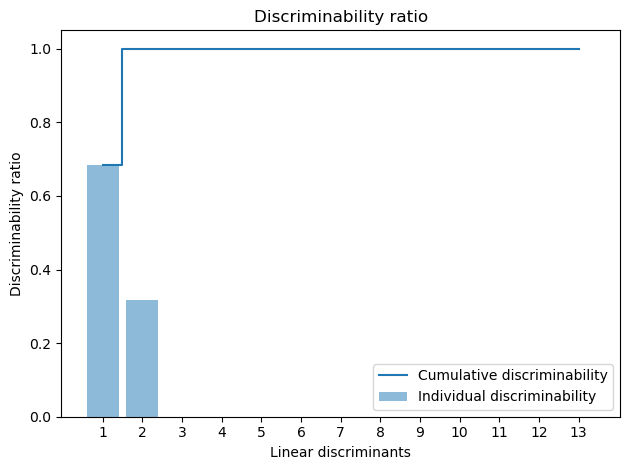

In [18]:
total = sum(eigen_vals.real)
exp_var = [(i / total) for i in sorted(eigen_vals.real, reverse=True)]
cum_exp_var = np.cumsum(exp_var)
plt.bar(range(1, 14), exp_var, alpha=0.5, align='center', label='Individual discriminability')
plt.step(range(1, 14), cum_exp_var, where='mid', label='Cumulative discriminability')
plt.xticks(range(1, 14))
plt.title('Discriminability ratio')
plt.xlabel('Linear discriminants')
plt.ylabel('Discriminability ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

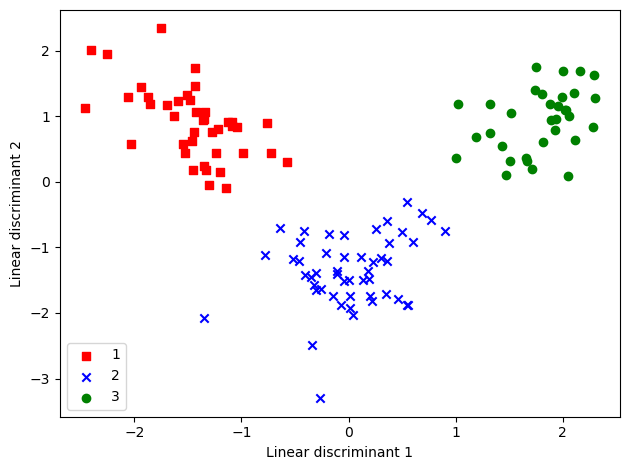

In [19]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
X_train_lda = X_train_std.dot(W)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1] * (-1), c=c, label=l, marker=m)
plt.xlabel('Linear discriminant 1')
plt.ylabel('Linear discriminant 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## LDA using scikit-learn

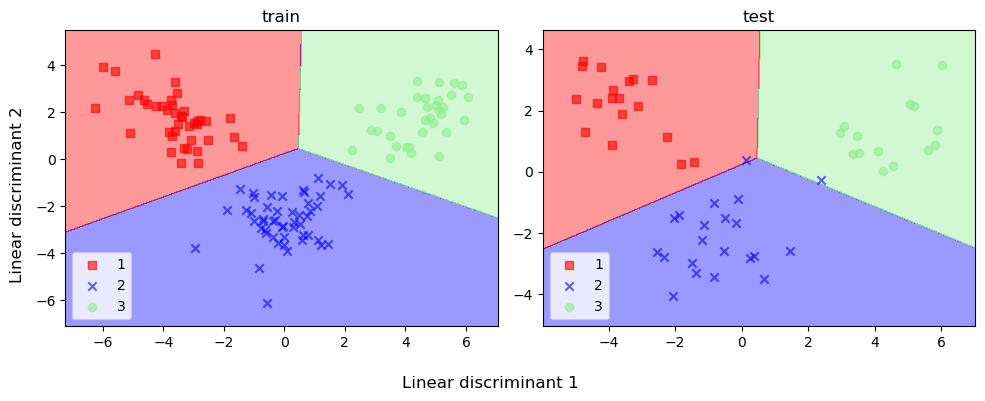

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='eigen', n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train) # train logistic regression model using X_train_lda
utils.visualize_decision_boundary(X_train_lda, y_train, classifier=lr, \
                            x_test=X_test_lda, y_test=y_test, \
                            xlabel="Linear discriminant 1", ylabel="Linear discriminant 2")

# kernel PCA

It is common to have datasets that are non-linear. For those, both PCA and LDA methods are not suitable, because they are dimensionality reduction techiques for linear transformation. Hence, we need to implement the kernel PCA techique which deals with feature extraction of non-linear dataset by using the kernel trick.

The non-linear mapping function $\phi$ is a function to transform the dataset from initial $d$-dimensional space to a higher $k$-dimensional space where $k >> d$. Then, we use original PCA algorithm to transform the data (e.g. two principle components, PC1 and PC2) where the classifier can able to linearly distinguish each class label. However, this process requires tremendous computation resources, so we use the kernel trick (known as mapping function) to calculate the similiarity of two high-dimensional feature vectors that is already defined (e.g. Radial Basis Function).

Calculation for kernel (radial basis function): $K(x^{i}, x^{j}) = \phi(x^{i})^{T} \phi(x^{j}) = exp(-\gamma \|(x^{i} - x^{j}\|^2)$.

In [21]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from numpy import exp

'''
Radial Basis Function (RBF) Kernel PCA
''' 
def rbf_kernel_pca(x, gamma, n_components):
    sq_dists = pdist(x, 'sqeuclidean') # calculate the euclidean distance between samples 
    sq_dists_mat = squareform(sq_dists)
    K = exp(-gamma * sq_dists_mat) # calculate kernel
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigen_vals, eigen_vecs = eigh(K)
    eigen_vals, eigen_vecs = eigen_vals[::-1], eigen_vecs[:, ::-1]
    x_kpca = np.column_stack([eigen_vecs[:, i] for i in range(n_components)])
    return x_kpca

In [22]:
def plot_datasets(x, y, num):
    num = int(num/2)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
    ax[0].scatter(x[y == 0, 0], x[y == 0, 1], color='red', marker='^', alpha=0.5)
    ax[0].scatter(x[y == 1, 0], x[y == 1, 1], color='blue', marker='o', alpha=0.5)
    ax[1].scatter(x[y == 0, 0], np.zeros((num, 1)), color='red', marker='^', alpha=0.5)
    ax[1].scatter(x[y == 1, 0], np.zeros((num, 1)), color='blue', marker='o', alpha=0.5)
    ax[0].set_xlabel('PC1')
    ax[0].set_ylabel('PC2')
    ax[1].set_ylim([-1, 1])
    ax[1].set_yticks([])
    ax[1].set_xlabel('PC1')
    plt.show()

Using original PCA cannot able to linearly classify non-linear datasets shown below.
1. Non-linear half-moon dataset
2. Non-linear circle dataset

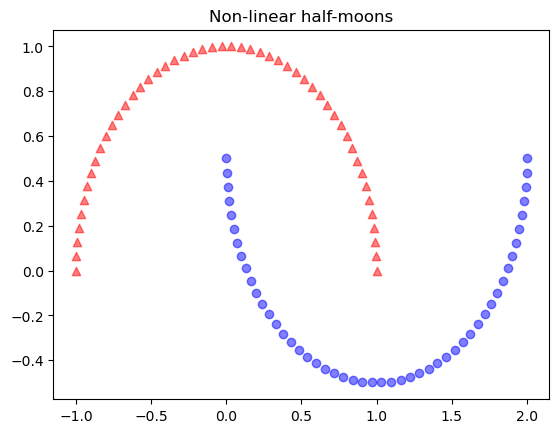

In [23]:
from sklearn.datasets import make_moons
x_moons, y_moons = make_moons(n_samples=100, random_state=123)
plt.scatter(x_moons[y_moons == 0, 0], x_moons[y_moons == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(x_moons[y_moons == 1, 0], x_moons[y_moons == 1, 1], color='blue', marker='o', alpha=0.5)
plt.title('Non-linear half-moons')
plt.show()

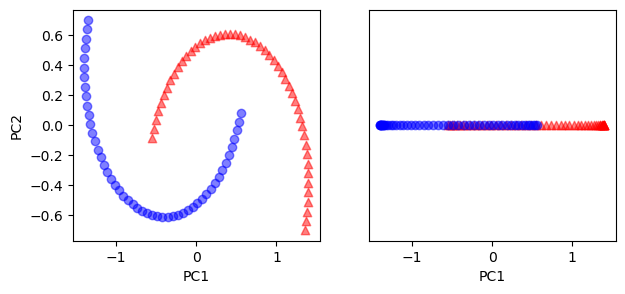

In [24]:
pca = PCA(n_components=2)
x_moons_pca = pca.fit_transform(x_moons)
plot_datasets(x_moons_pca, y_moons, 100)

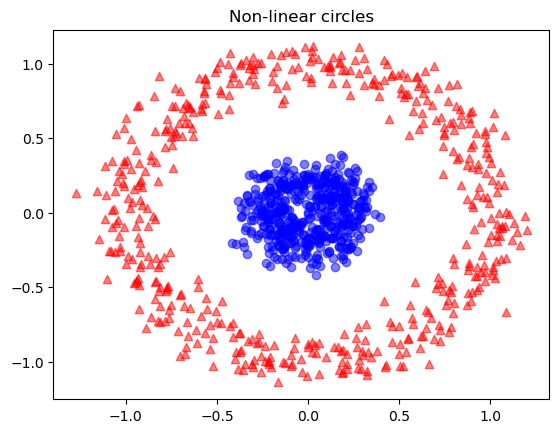

In [25]:
from sklearn.datasets import make_circles
x_circles, y_circles = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(x_circles[y_circles == 0, 0], x_circles[y_circles == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(x_circles[y_circles == 1, 0], x_circles[y_circles == 1, 1], color='blue', marker='o', alpha=0.5)
plt.title('Non-linear circles')
plt.show()

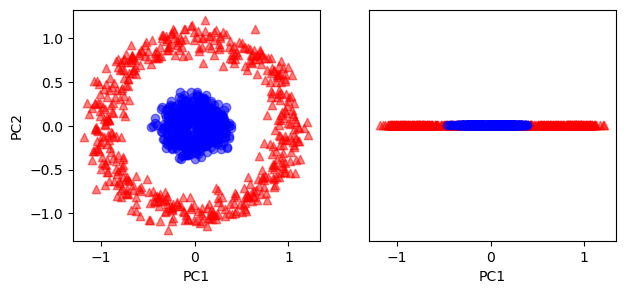

In [26]:
pca = PCA(n_components=2)
x_circles_pca = pca.fit_transform(x_circles)
plot_datasets(x_circles_pca, y_circles, 1000)

Using RBF kernel PCA can able to linearly distinguish non-linear data.

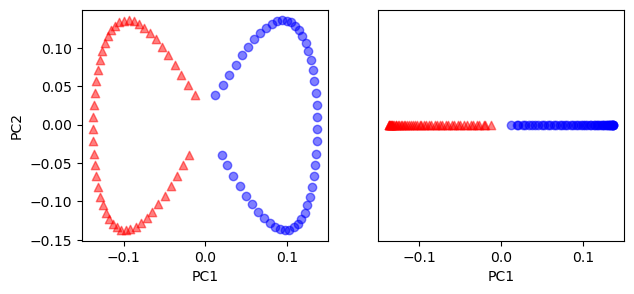

In [27]:
x_moons_kpca = rbf_kernel_pca(x_moons, gamma=15, n_components=2)
plot_datasets(x_moons_kpca, y_moons, 100)

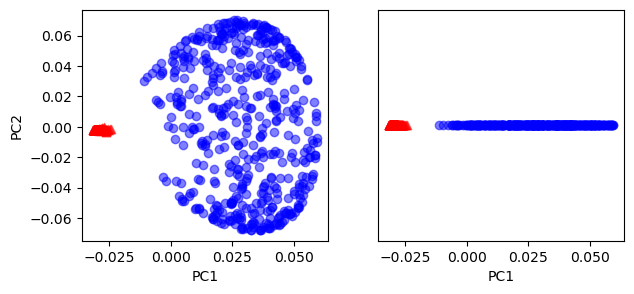

In [28]:
x_circles_kpca = rbf_kernel_pca(x_circles, gamma=15, n_components=2)
plot_datasets(x_circles_kpca, y_circles, 1000)

kernel PCA using scikit-learn API shows almost identical result we implemented above.

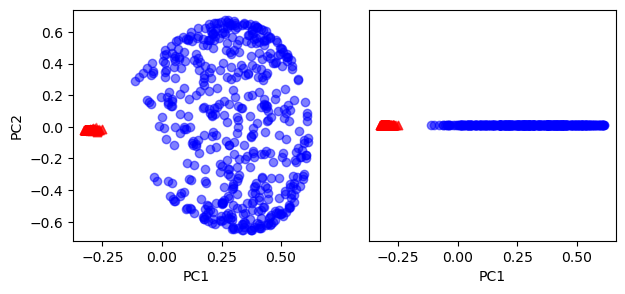

In [29]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
x_circles_skpca = kpca.fit_transform(x_circles)
plot_datasets(x_circles_skpca, y_circles, 1000)